### 1. Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible
rechazar la hipótesis nula.
75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron
como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como
heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La
organización encargada de procesar los datos obtuvo los siguientes resultados:
El 67% de los encuestados por heterosexuales se mostró a favor de la adopción
homoparental, mientras que un 72% de los encuestados por activistas que se identifaron
como homosexuales se mostraron a favor de la adopción homoparental.
Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la
hipótesis alternativa es que existe una diferencia substancial entre ambos.
Con un valor de prueba=11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

- El valor de p cercano a 12 significa que está por encima más de 4 veces del limite de la zona de rechazo(2.58) de hipotesis, es decir alejado casi 12 desviaciones estandar, lo que nos permite rechazar Ho y concluir que los porcentajes son diferentes con una significación estadística mayor al 99%. En pocas palabras, la diferencia de porcentajes es significativa y sugiere que hay un mayor porcentaje de individuos homosexuales que acepta la adopción homoparental que su contraparte heterosexual.

Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen
mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia
estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde
contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede
decir sobre su estudio?

- Es posible afirmar, que este estudio está mal diseñado porque una distribución normal asintótica requiere de un tamaño muestral muy grande (se habla de poblaciones no finitas) para que el estimador converja a una distribución normal de manera insesgada, por lo tanto se está cometiendo un error estadístico, ya que debido al tamaño muestral bajo, el estimador contrastado presenta un sesgo, que genera una inferencia errada. Debido al bajo tamaño muestral, es preferible emplear otro tipo de distribución y estimadores no paramétricos. 

 

### 2. Importe la base de datos utilizada la sesión presencial anterior

In [8]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
# Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [3]:
df=pd.read_csv('nations.csv', encoding='ISO-8859-1') # se añade el parametro 

df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


### 3. Implemente una función de prueba de hipótesis a mano


In [46]:
def test_hipotesis(dataframe, variable, binarize, value_binarize):
    """
    Definición: Esta función realiza una prueba de hipótesis de diferencia de medias
    Input: Dataframe; variable: variable numérica cuya media se quiere analizar-; binarize: variable categórica que se 
    usará para segmentar en dos grupos la variable numérica -;value_binarize: valor categórico de la variable a segmentar 
    cuyo valor sera 1, el resto de las categorías o la categoría, corresponderá a 0.
    Outpout: Imprime las medias de ambos grupos, la diferencia de medias, el valor estadístico de la prueba y la interpretación estadística
    
    """
    dataframe[ binarize + '_binarizada'] = np.where(dataframe[binarize] == value_binarize, 1, 0)
    variablebin_1=dataframe.query(binarize + '_binarizada == 1')[variable].dropna()
    variablebin_0=dataframe.query(binarize + '_binarizada ==0')[variable].dropna()
    medias =print( "Las medias de ambos grupos binarizados son: ","Grupo valor (1): ", round(variablebin_1.mean(), 3),"Grupo valor (0): ", round(variablebin_0.mean(), 3))
    diferencia_de_medias =print( "La diferencia de medias entre la variable binarizada es: ", variablebin_1.mean() - variablebin_0.mean() )
    valor_test = print ("Los resultados del test de hipotésis son : ", stats.ttest_ind(variablebin_1, variablebin_0))
    limit = stats.ttest_ind(variablebin_1, variablebin_0).pvalue  
    if limit < 0.05:                      
       print ("El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística")
    else:
       print ("El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística")
    
    
    
test_hipotesis(df,'femlab','region','Africa')
    
    
    
    
    
    
    

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.73 Grupo valor (0):  0.676
La diferencia de medias entre la variable binarizada es:  0.05380821282984949
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=1.783872878266046, pvalue=0.0761771840435915)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


### 4 . Implemente una función que grafique los histogramas para ambas muestras.


In [83]:
def binarize_histogram(dataframe, variable, binarize, value_binarize):
    """
    Definición: Esta función genera un histograma para cada conjunto de variables binarizadas
    Input: Dataframe; variable: variable numérica que se quiere graficar-; binarize: variable categórica que se 
    usará para segmentar en dos grupos la variable numérica -;value_binarize: valor categórico de la variable a segmentar 
    cuyo valor sera 1, el resto de las categorías o la categoría, corresponderá a 0.
    Outpout: Genera dos histogramas para ambos casos
    
    """
    dataframe[ binarize + '_binarizada'] = np.where(dataframe[binarize] == value_binarize, 1, 0)
    variablebin_1=dataframe.query(binarize + '_binarizada == 1')[variable].dropna()
    variablebin_0=dataframe.query(binarize + '_binarizada ==0')[variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(variablebin_1, alpha=.6, color='lightgrey', Label=(variable,"1"))
    plt.axvline(np.mean(variablebin_1))
    plt.title("{0}{1} <= {2}".format(variable," (valor 1)", round(np.mean(variablebin_1), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(variablebin_0, alpha=.6, color='lightgrey',Label=(variable,"0"))
    plt.axvline(np.mean(variablebin_0))
    plt.title("{0}{1} <= {2}".format(variable," (valor 0)", round(np.mean(variablebin_0), 3)))

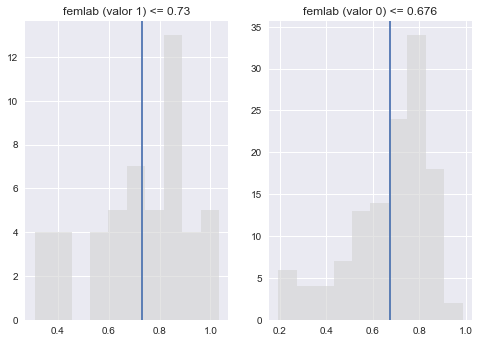

In [84]:
binarize_histogram(df,'femlab','region','Africa')

### Análisis de las diferencias de medias para las variables de interes femlab , literacy y school para cada continente


### - femlab 


In [85]:
test_hipotesis(df,'femlab','region','Africa')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.73 Grupo valor (0):  0.676
La diferencia de medias entre la variable binarizada es:  0.05380821282984949
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=1.783872878266046, pvalue=0.0761771840435915)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


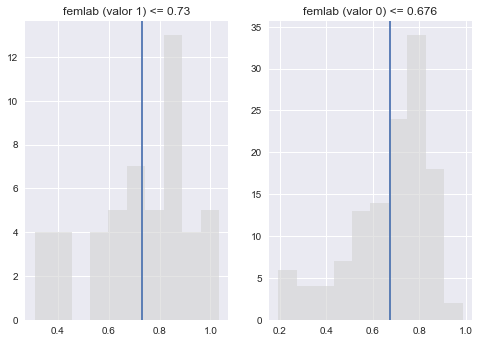

In [86]:
binarize_histogram(df,'femlab','region','Africa')

- No se aprecian diferencias significativas entre la fuerza laboral de mujeres y hombres para África en relación al resto de los continentes

In [87]:
test_hipotesis(df,'femlab','region','Asia')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.611 Grupo valor (0):  0.722
La diferencia de medias entre la variable binarizada es:  -0.11102789847123229
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=-3.7455196595318414, pvalue=0.00024413257519365062)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


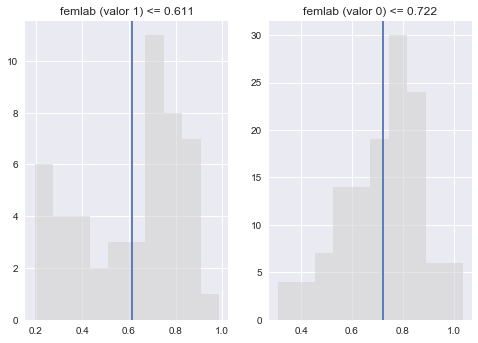

In [88]:
binarize_histogram(df,'femlab','region','Asia')

- Se aprecian diferencias significativas entre la fuerza laboral de mujeres y hombres para Asia en relación al resto de los continentes, al parecer en Asia es ligeramente menor la proporción de mujeres y hombres en el mercado laboral

In [89]:
test_hipotesis(df,'femlab','region','Americas')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.651 Grupo valor (0):  0.7
La diferencia de medias entre la variable binarizada es:  -0.04953242946700931
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=-1.3731113408683462, pvalue=0.1714745430099794)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


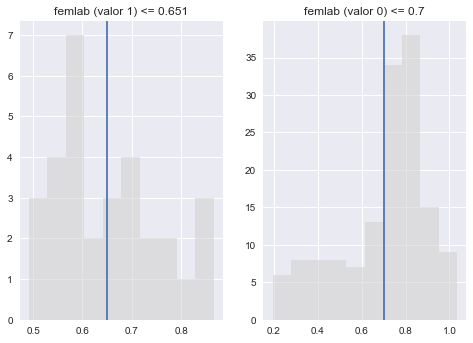

In [90]:
binarize_histogram(df,'femlab','region','Americas')

- No se aprecian diferencias significativas entre la fuerza laboral de mujeres y hombres para América en relación al resto de los continentes

In [91]:
test_hipotesis(df,'femlab','region','Europe')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.772 Grupo valor (0):  0.67
La diferencia de medias entre la variable binarizada es:  0.1011767109014583
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=3.063523760334362, pvalue=0.0025335604834548654)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


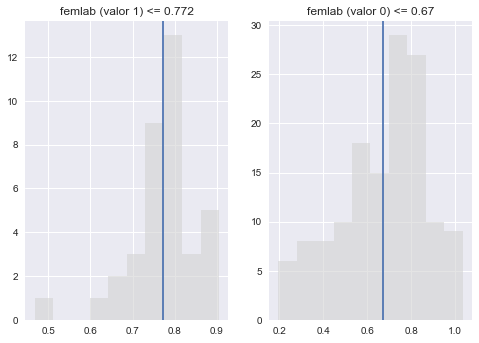

In [92]:
binarize_histogram(df,'femlab','region','Europe')

- Se aprecian diferencias significativas entre la fuerza laboral de mujeres y hombres para Europa en relación al resto de los continentes, al parecer en Europa es ligeramente mayor la proporción de mujeres y hombres en el mercado laboral

In [94]:
test_hipotesis(df,'femlab','region','Oceania')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  0.723 Grupo valor (0):  0.69
La diferencia de medias entre la variable binarizada es:  0.033521042900189535
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=0.5346624412260645, pvalue=0.593561944121326)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


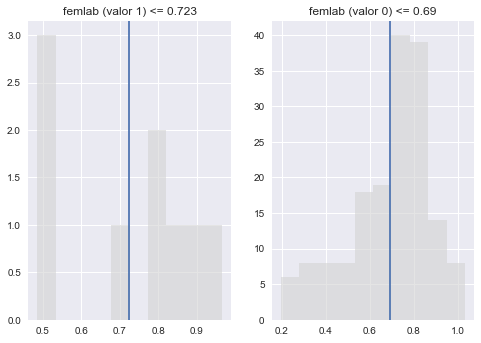

In [95]:
binarize_histogram(df,'femlab','region','Oceania')

- No se aprecian diferencias significativas entre la fuerza laboral de mujeres y hombres para Oceanía en relación al resto de los continentes

### - literacy

In [96]:
test_hipotesis(df,'literacy','region','Africa')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  65.309 Grupo valor (0):  90.199
La diferencia de medias entre la variable binarizada es:  -24.890068675839927
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=-8.909991173873896, pvalue=3.3857112156459963e-15)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


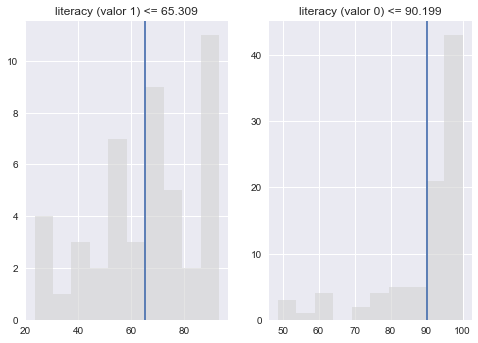

In [97]:
binarize_histogram(df,'literacy','region','Africa')

- Se aprecian diferencias significativas entre la tasa de alfabetismo para Africa en relación al resto de los continentes, al parecer en Africa es menor la tasa de alfabetismo en comparación al promedio del resto de los continentes

In [98]:
test_hipotesis(df,'literacy','region','Americas')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  89.301 Grupo valor (0):  80.182
La diferencia de medias entre la variable binarizada es:  9.119076081980836
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=1.953805549546212, pvalue=0.05282297025501065)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


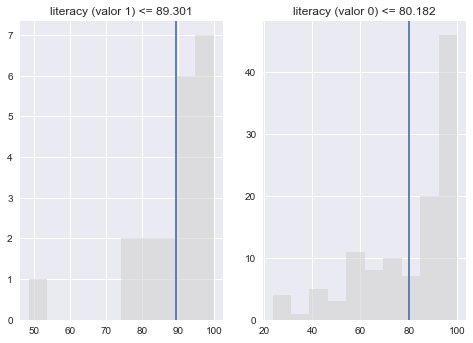

In [99]:
binarize_histogram(df,'literacy','region','Americas')

- No se aprecian diferencias significativas entre la tasa de alfabetismo para América en relación al resto de los continentes

In [100]:
test_hipotesis(df,'literacy','region','Asia')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  87.357 Grupo valor (0):  78.993
La diferencia de medias entre la variable binarizada es:  8.364497467836813
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=2.3336279461015885, pvalue=0.021114460773250368)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


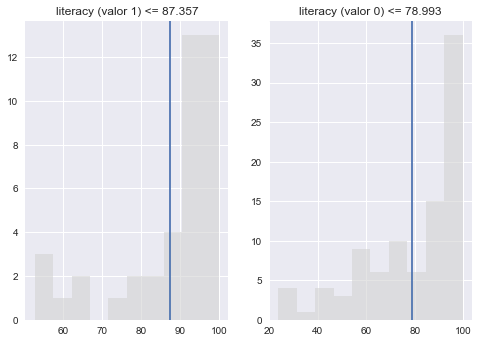

In [101]:
binarize_histogram(df,'literacy','region','Asia')

- Se aprecian diferencias significativas entre la tasa de alfabetismo para Asia en relación al resto de los continentes, al parecer en Asia es mayor la tasa de alfabetismo en comparación al promedio del resto de los continentes

In [106]:
test_hipotesis(df,'literacy','region','Europe')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  98.177 Grupo valor (0):  78.293
La diferencia de medias entre la variable binarizada es:  19.884573826747655
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=4.71843149821332, pvalue=5.935608765865936e-06)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


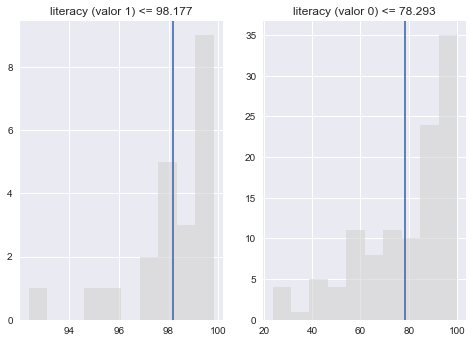

In [105]:
binarize_histogram(df,'literacy','region','Europe')

- Se aprecian diferencias significativas entre la tasa de alfabetismo para Asia en relación al resto de los continentes, al parecer en Europa es mayor la tasa de alfabetismo en comparación al promedio del resto de los continentes

In [107]:
test_hipotesis(df,'literacy','region','Oceania')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  81.98 Grupo valor (0):  81.516
La diferencia de medias entre la variable binarizada es:  0.4640388928926882
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=0.05211194697890982, pvalue=0.9585176817316319)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


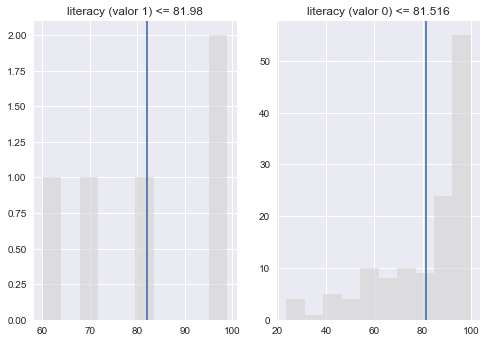

In [109]:
binarize_histogram(df,'literacy','region','Oceania')

- No se aprecian diferencias significativas entre la tasa de alfabetismo para Oceania en relación al resto de los continentes

### - school

In [110]:
test_hipotesis(df,'school','region','Africa')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  4.523 Grupo valor (0):  8.552
La diferencia de medias entre la variable binarizada es:  -4.029435599500297
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=-10.415811831777058, pvalue=2.6352830456717332e-20)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


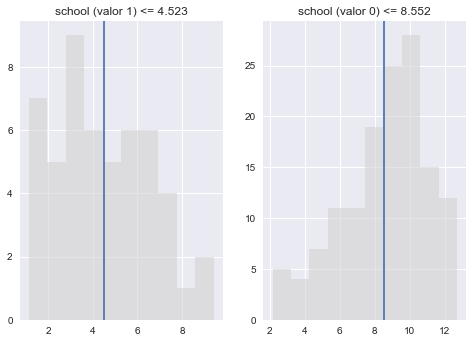

In [111]:
binarize_histogram(df,'school','region','Africa')

- Se aprecian diferencias significativas entre la tasa de escolaridad para Africa en relación al resto de los continentes, al parecer en Africa es menor la tasa de escolaridad en comparación al promedio del resto de los continentes

In [112]:
test_hipotesis(df,'school','region','Americas')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  8.073 Grupo valor (0):  7.319
La diferencia de medias entre la variable binarizada es:  0.7540117535827084
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=1.362827174571195, pvalue=0.17458464986808925)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


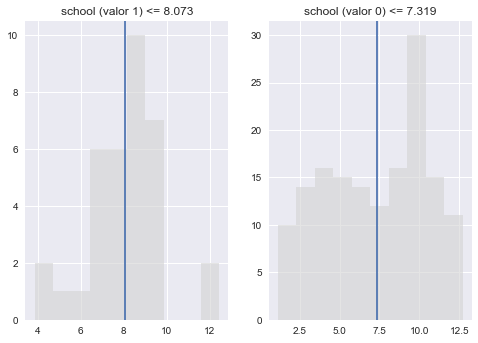

In [113]:
binarize_histogram(df,'school','region','Americas')

- No se aprecian diferencias significativas entre la tasa de escolaridad para América en relación al resto de los continentes

In [114]:
test_hipotesis(df,'school','region','Asia')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  7.261 Grupo valor (0):  7.527
La diferencia de medias entre la variable binarizada es:  -0.2660317162672685
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=-0.5363879996523622, pvalue=0.5923313578645575)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


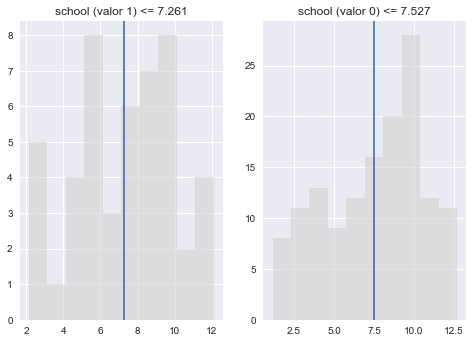

In [115]:
binarize_histogram(df,'school','region','Asia')

- No se aprecian diferencias significativas entre la tasa de escolaridad para Asia en relación al resto de los continentes

In [120]:
test_hipotesis(df,'school','region','Europe')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  10.422 Grupo valor (0):  6.633
La diferencia de medias entre la variable binarizada es:  3.788551476339168
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=8.524346217730443, pvalue=5.20910302336092e-15)
El P- valor es inferior a 0.05 por lo tanto se rechaza la hipotesis nula (Ho) y se acepta que las medias son diferentes, esto se puede afirmar con un 95 % de significancia estadística


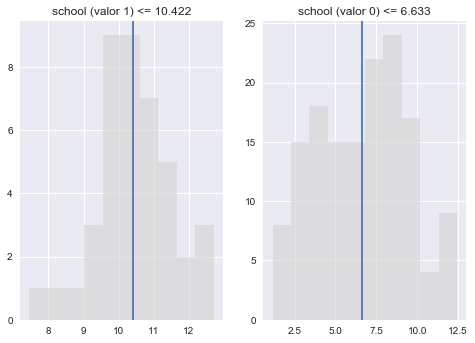

In [121]:
binarize_histogram(df,'school','region','Europe')

- Se aprecian diferencias significativas entre la tasa de escolaridad para Europa en relación al resto de los continentes, al parecer en Europa es mayor la tasa de escolaridad en comparación al promedio del resto de los continentes

In [123]:
test_hipotesis(df,'school','region','Oceania')

Las medias de ambos grupos binarizados son:  Grupo valor (1):  8.715 Grupo valor (0):  7.366
La diferencia de medias entre la variable binarizada es:  1.3494799906342934
Los resultados del test de hipotésis son :  Ttest_indResult(statistic=1.592662858961424, pvalue=0.11293383755111722)
El P- valor es superior a 0.05 por lo tanto no se rechaza la hipotesis nula (Ho), por lo que las medias no son diferentes, esto se puede afirmar con un 95 % de significancia estadística


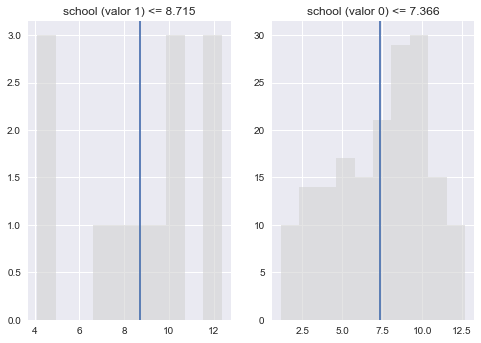

In [124]:
binarize_histogram(df,'school','region','Oceania')

- No se aprecian diferencias significativas entre la tasa de escolaridad de Oceanía en relación al resto de los continentes